# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Aththariq Lisan (18222013)
- Name (NIM)
- ...

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

## Import Dataset

In [4]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1w8DnxXGwaF1dLKlMxmXWVQFOH4vcvfTp')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [5]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [6]:
# 1. Cek missing values
print("Missing values per column:")
print(df.isnull().sum())

missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))


Missing values per column:
id                                0
FILENAME                      57532
URL                           43487
URLLength                     60639
Domain                        70197
DomainLength                  46319
IsDomainIP                    42130
TLD                           45399
CharContinuationRate          48042
TLDLegitimateProb             52873
URLCharProb                   52071
TLDLength                     47731
NoOfSubDomain                 44060
HasObfuscation                65720
NoOfObfuscatedChar            66798
ObfuscationRatio              64598
NoOfLettersInURL              63338
LetterRatioInURL              65746
NoOfDegitsInURL               58810
DegitRatioInURL               53508
NoOfEqualsInURL               61578
NoOfQMarkInURL                44101
NoOfAmpersandInURL            45387
NoOfOtherSpecialCharsInURL    47629
SpacialCharRatioInURL         62834
IsHTTPS                       49362
LineOfCode                    69153
L

In [7]:
from sklearn.impute import SimpleImputer
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')  
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])


In [9]:
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
id                            0
FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMat

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [10]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# untuk mendeteksi outliers
outlier_mask = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()
print("Jumlah outliers per kolom:")
print(outlier_counts[outlier_counts > 0])


Jumlah outliers per kolom:
URLLength                     21909
DomainLength                   8106
IsDomainIP                       48
CharContinuationRate          17234
URLCharProb                   28158
TLDLength                     29194
NoOfSubDomain                 15938
HasObfuscation                   30
NoOfObfuscatedChar               23
ObfuscationRatio                 32
NoOfLettersInURL              29092
LetterRatioInURL              51849
NoOfDegitsInURL                4861
DegitRatioInURL                5185
NoOfEqualsInURL                 298
NoOfQMarkInURL                  418
NoOfAmpersandInURL               64
NoOfOtherSpecialCharsInURL     6226
SpacialCharRatioInURL         18776
IsHTTPS                        3483
LineOfCode                    10138
LargestLineLength              6743
HasTitle                       2390
DomainTitleMatchScore         25948
URLTitleMatchScore            25035
IsResponsive                  18287
NoOfURLRedirect                8885
N

In [11]:
#Antara clipping atau imputasi 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_threshold = 0.05  

for col in numerical_cols:
    num_outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()
    outlier_ratio = num_outliers / len(df)

    if outlier_ratio > outlier_threshold:
        df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])
    else:
        df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), df[col].median())

In [12]:
#Transformasi buat yang banyak outliernya
for col in ['URLLength', 'LetterRatioInURL', 'TLDLength']:
    df[f'{col}_log'] = np.log1p(df[col])


/var/folders/p_/ggqsslsj5vd7rzv1ywtkwchh0000gn/T/ipykernel_29127/3791370821.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


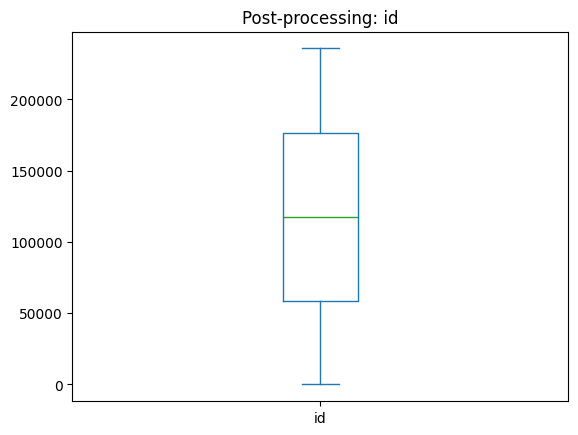

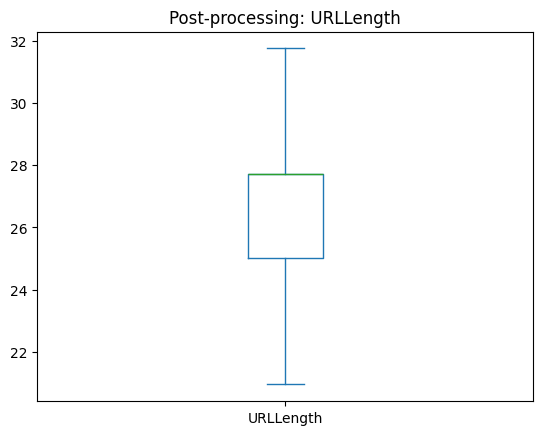

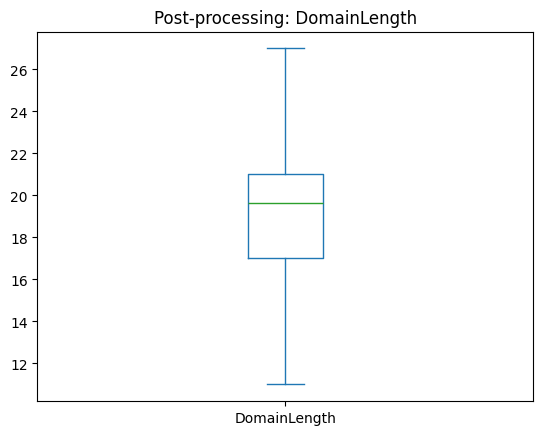

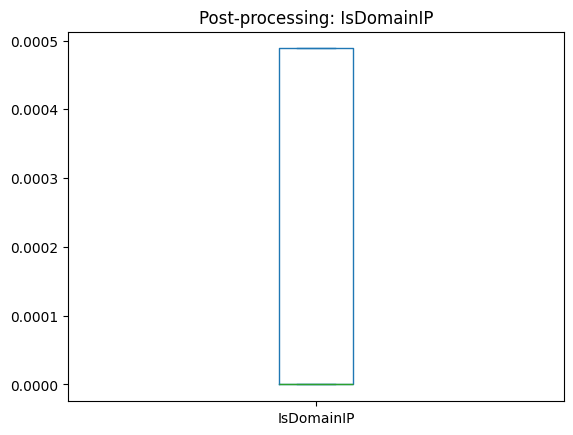

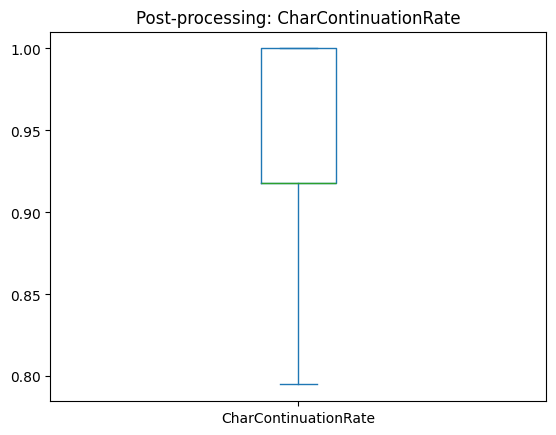

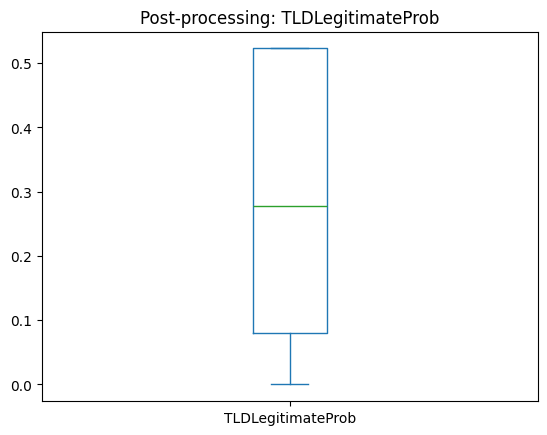

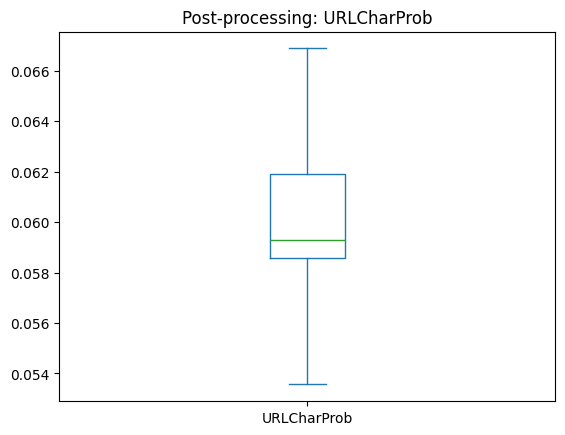

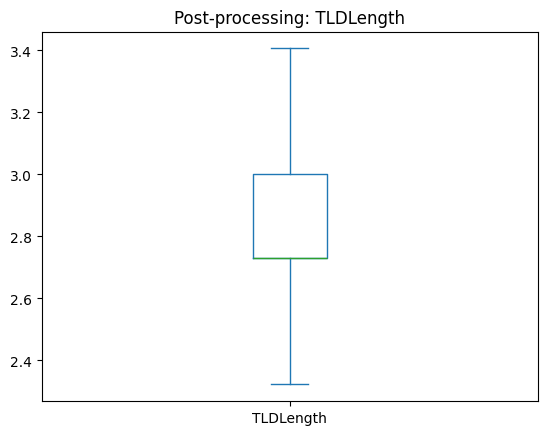

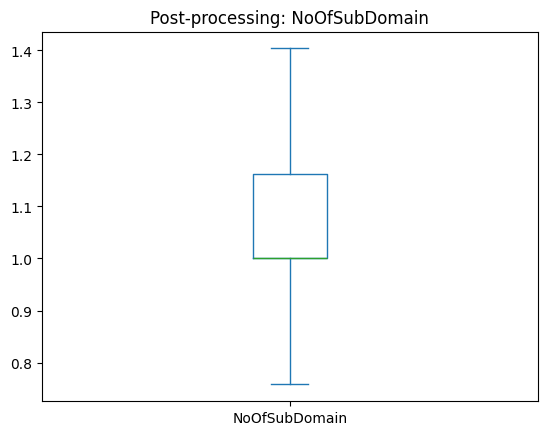

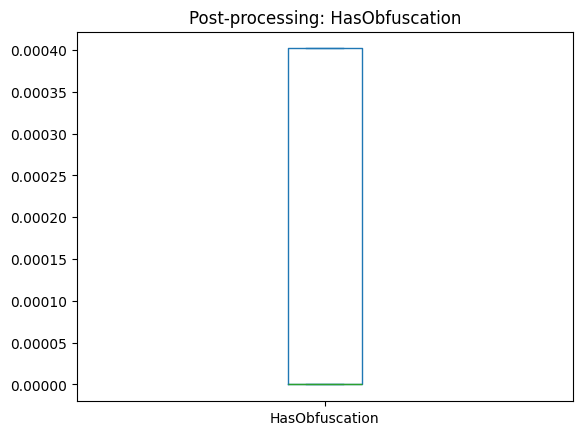

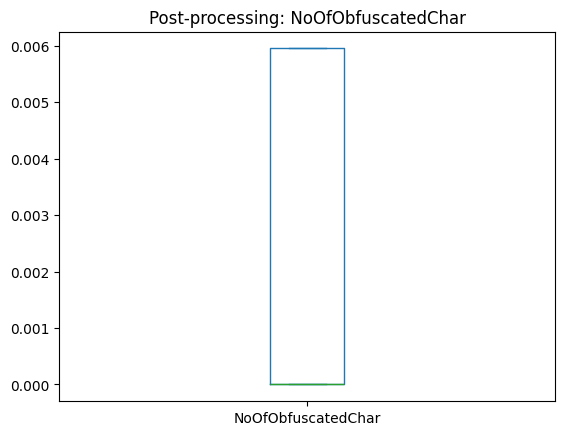

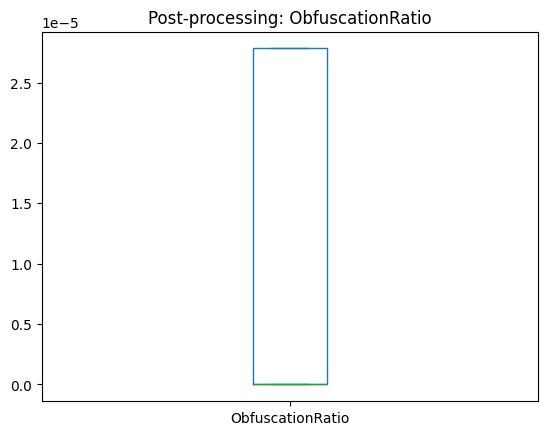

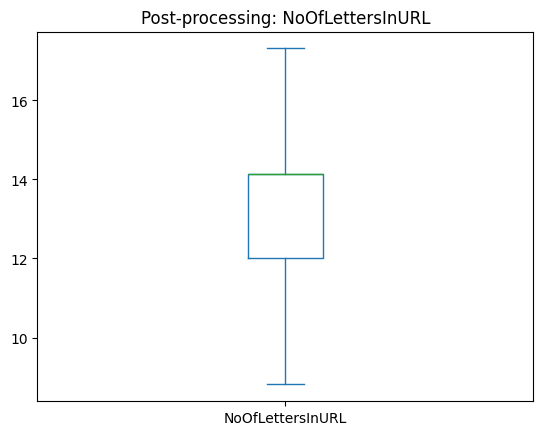

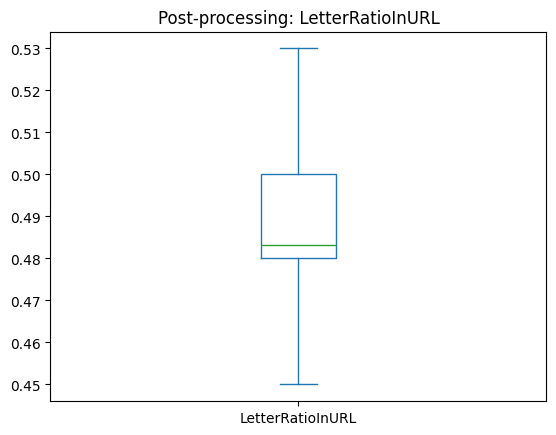

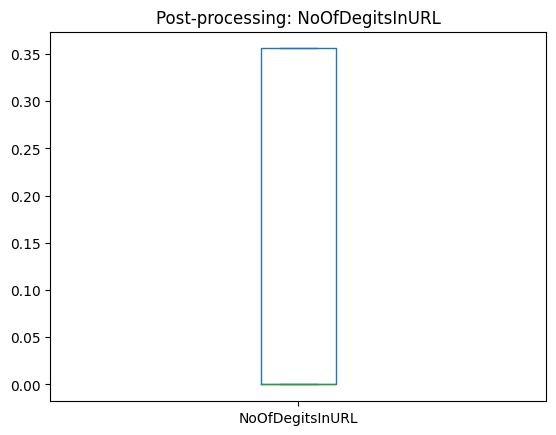

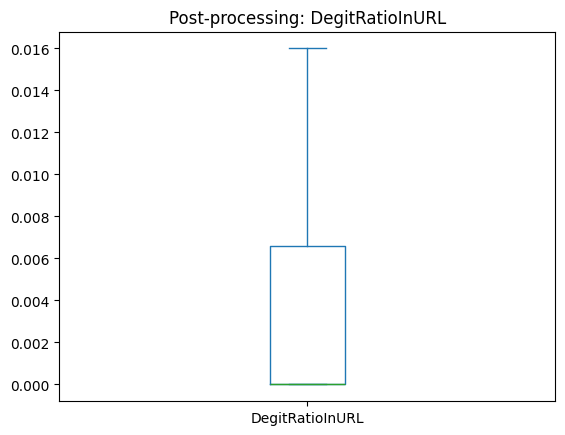

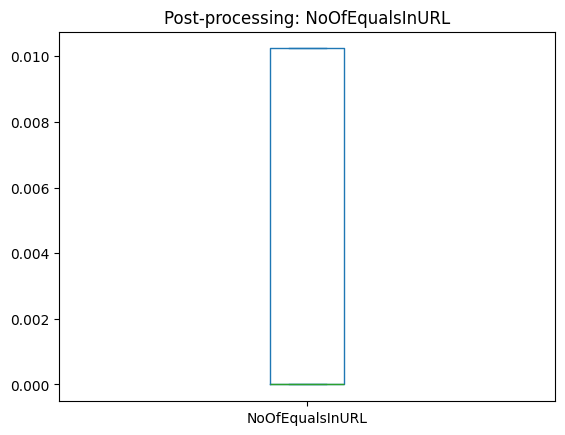

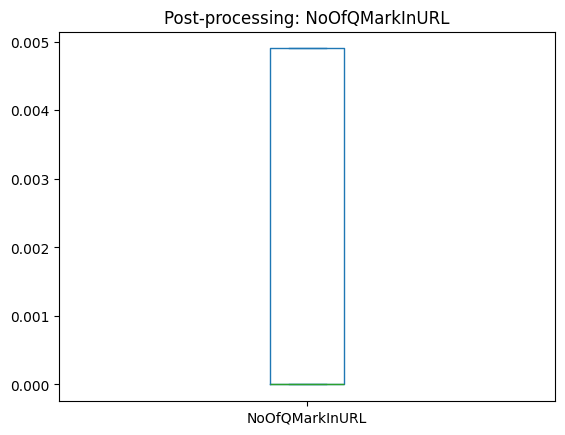

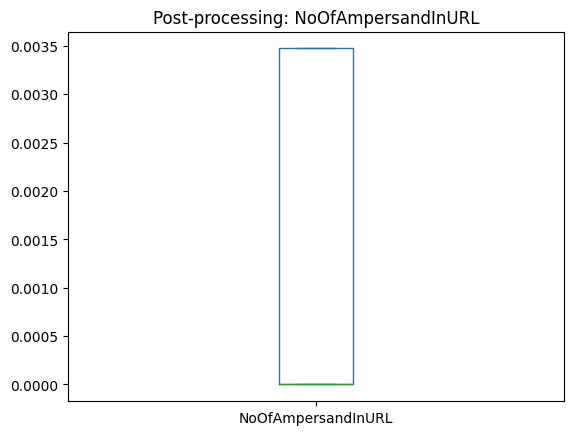

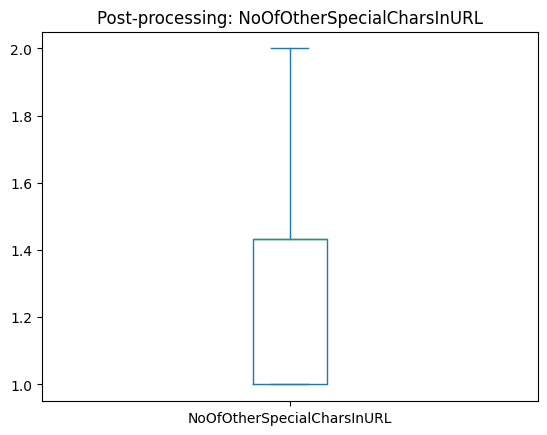

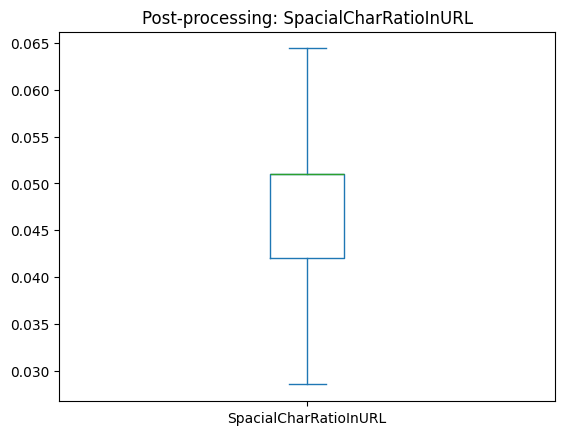

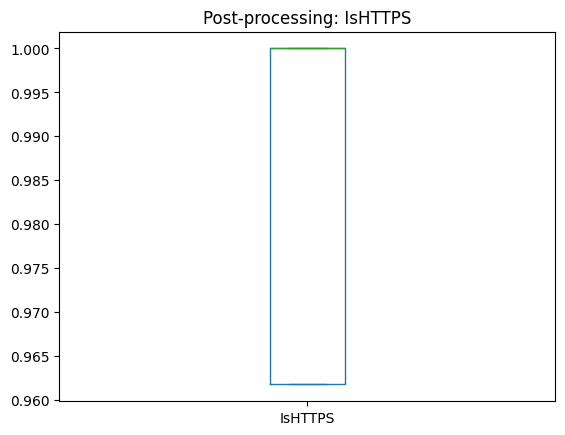

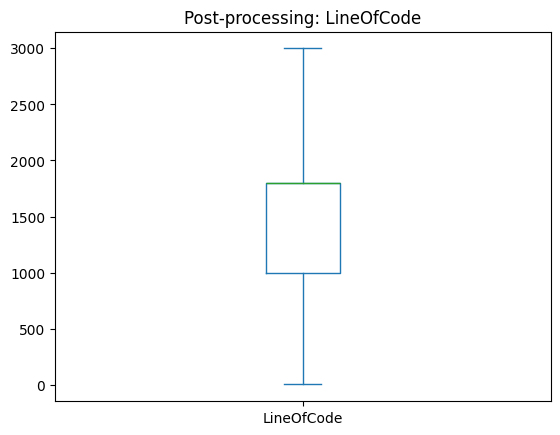

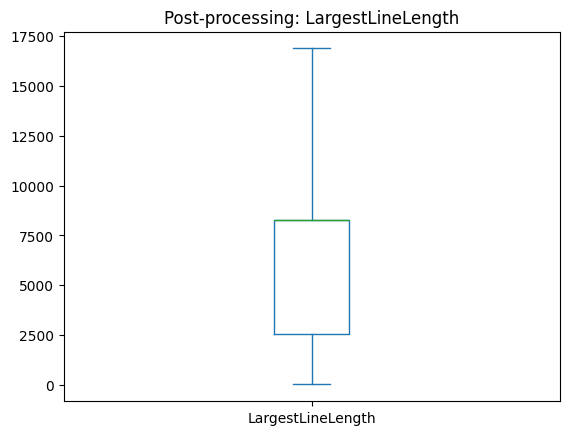

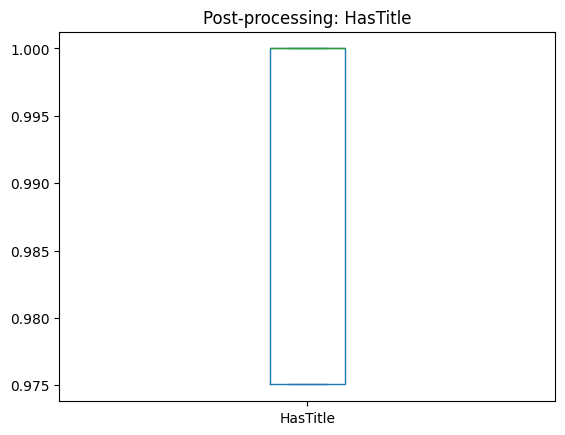

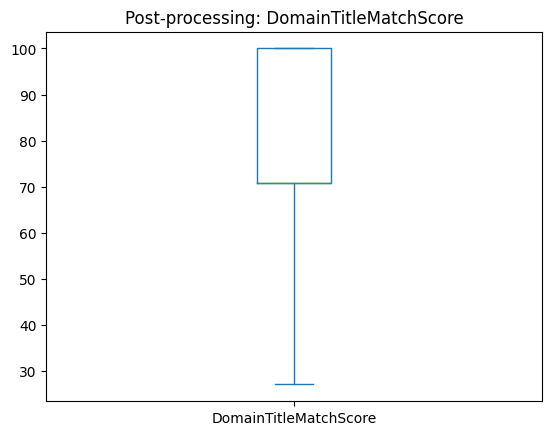

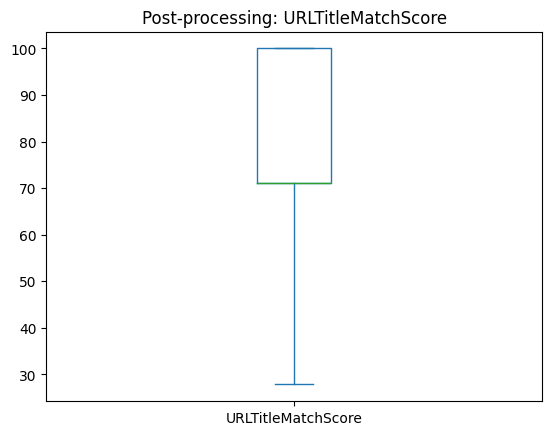

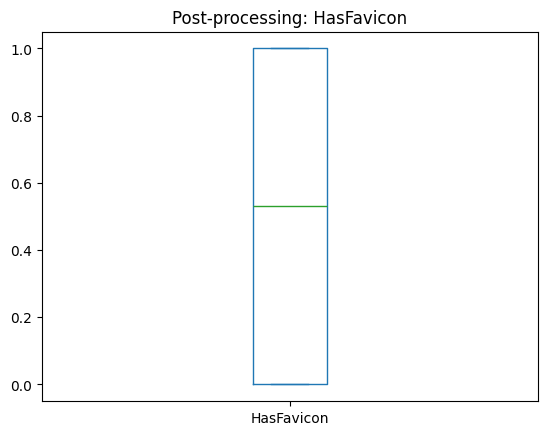

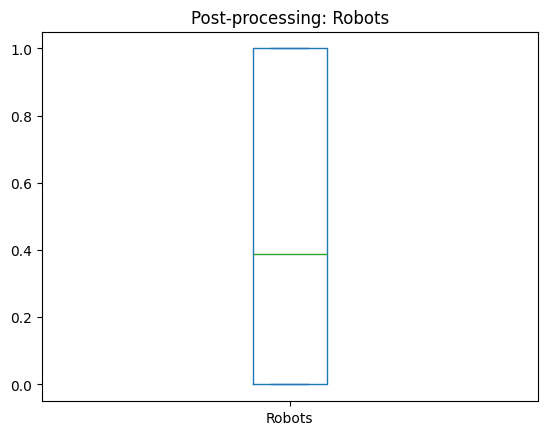

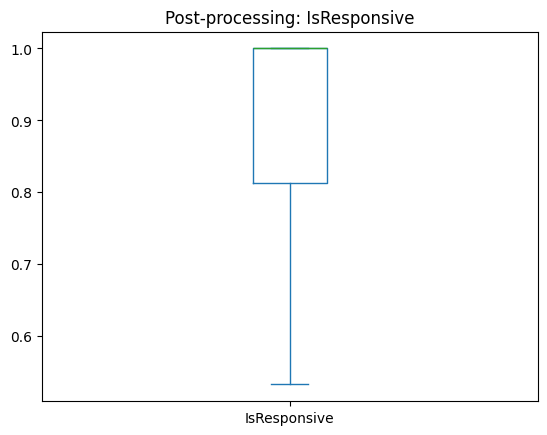

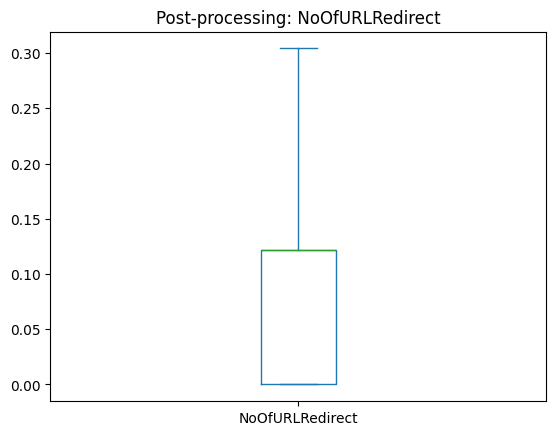

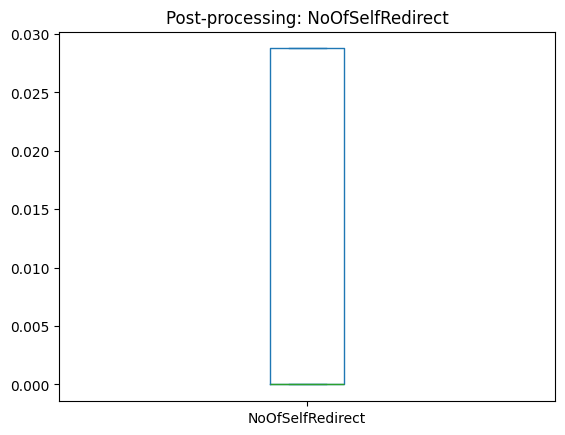

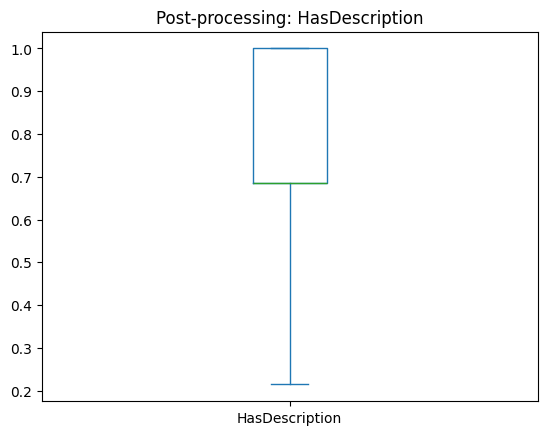

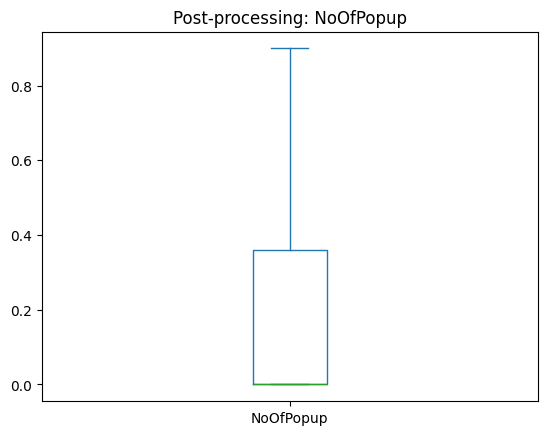

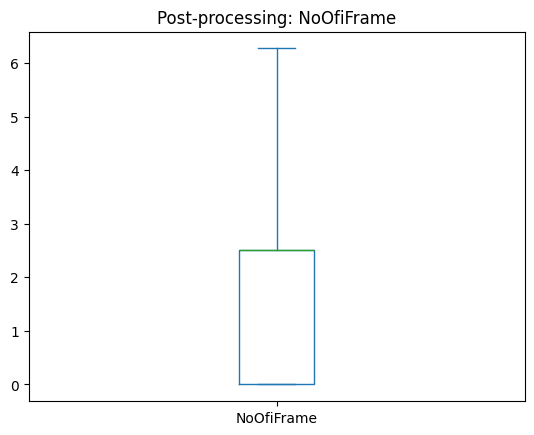

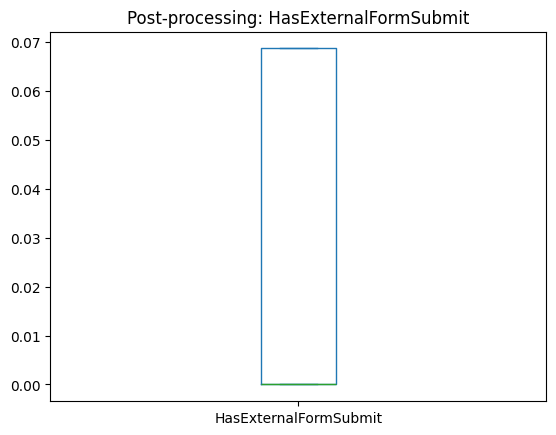

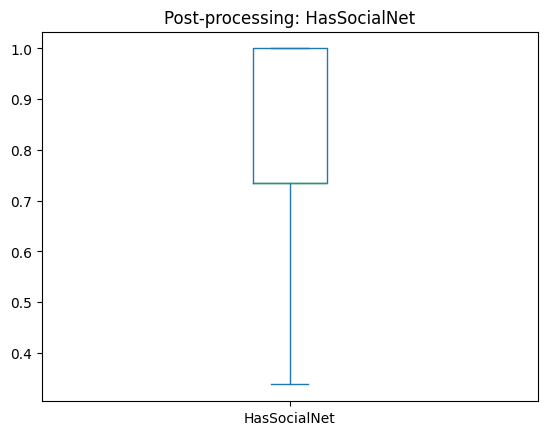

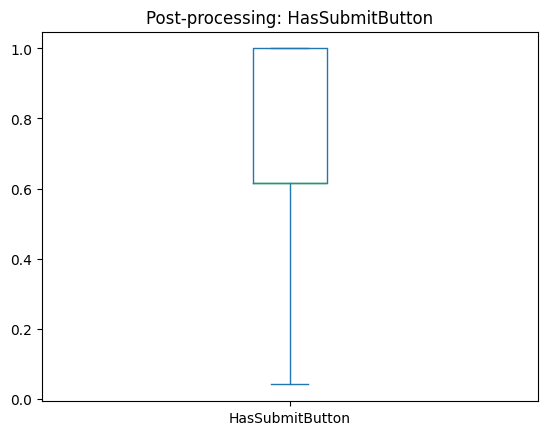

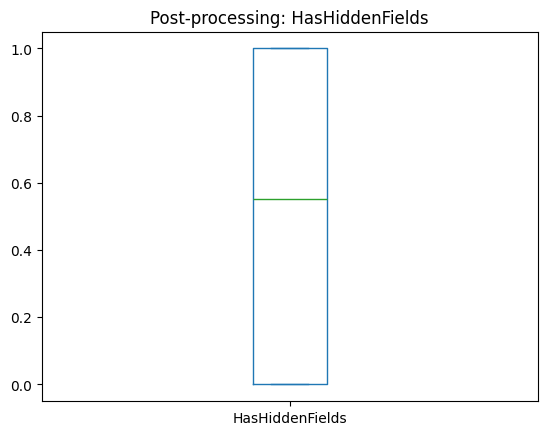

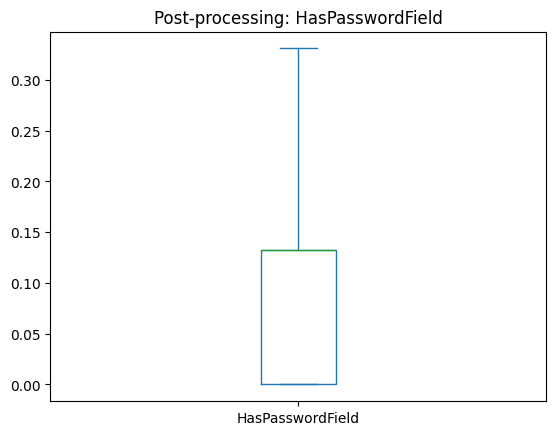

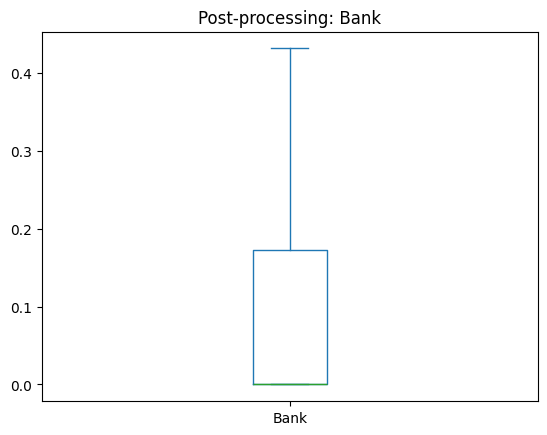

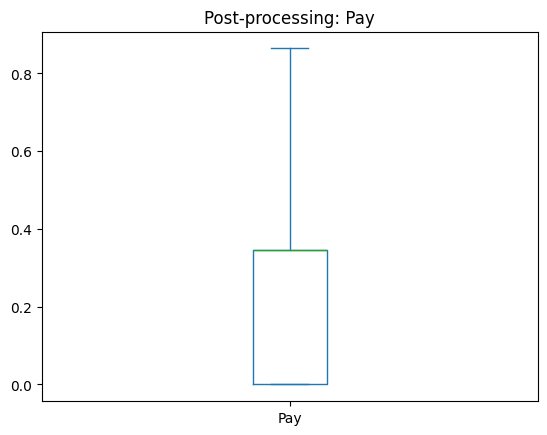

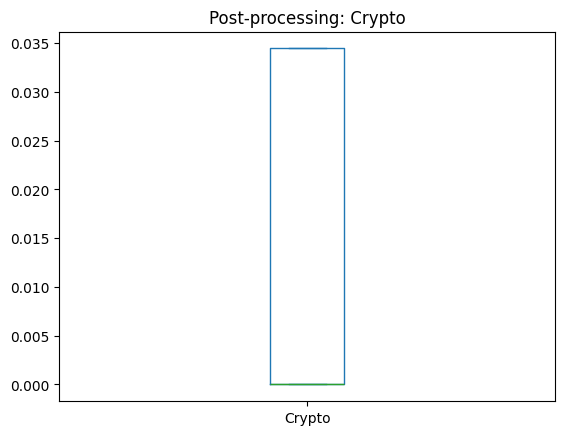

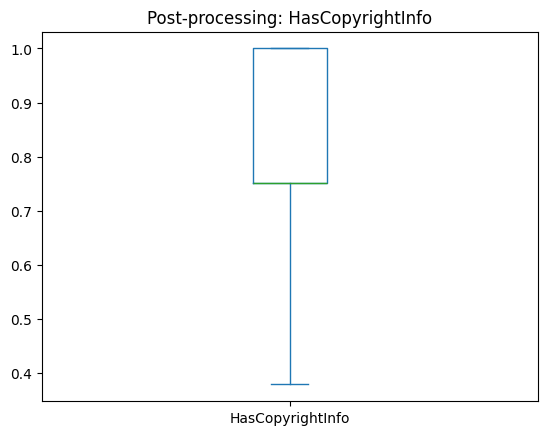

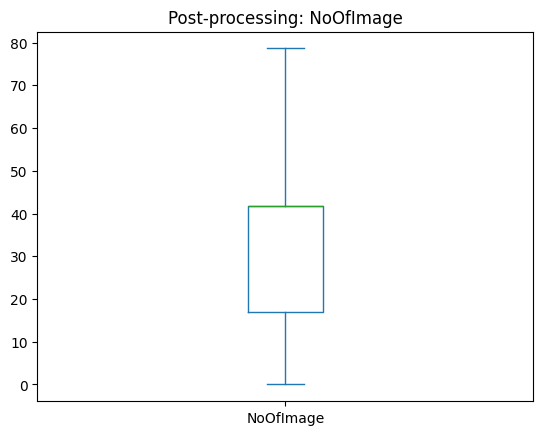

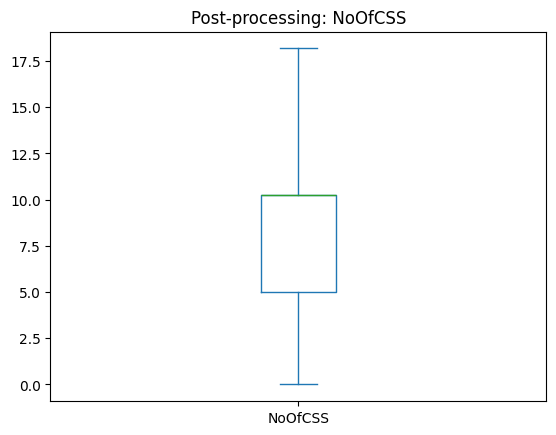

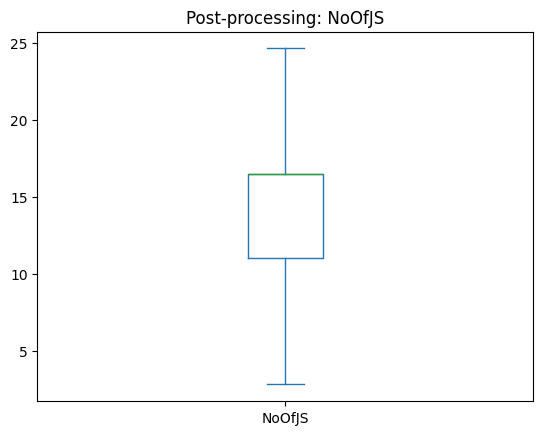

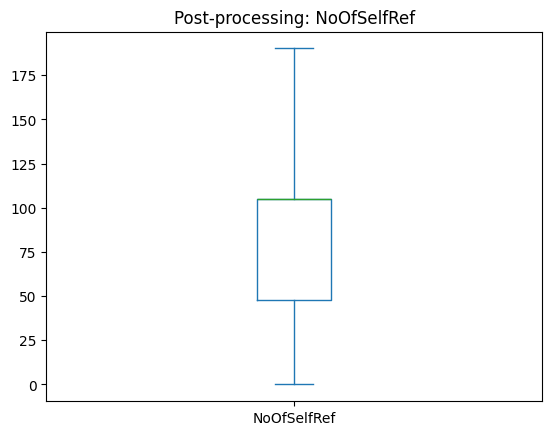

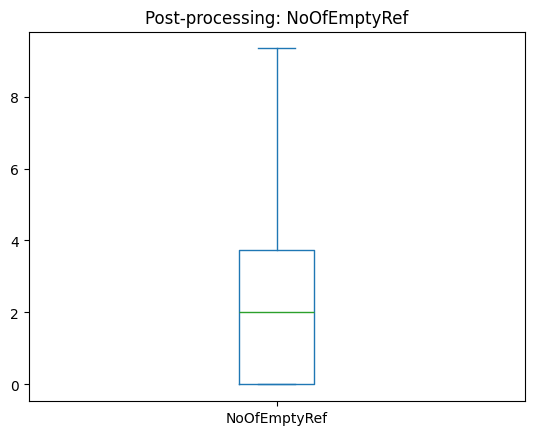

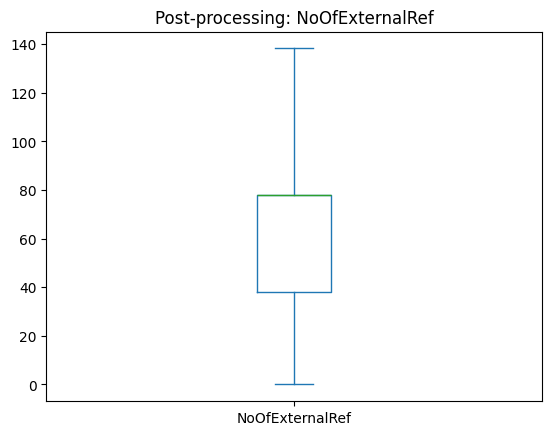

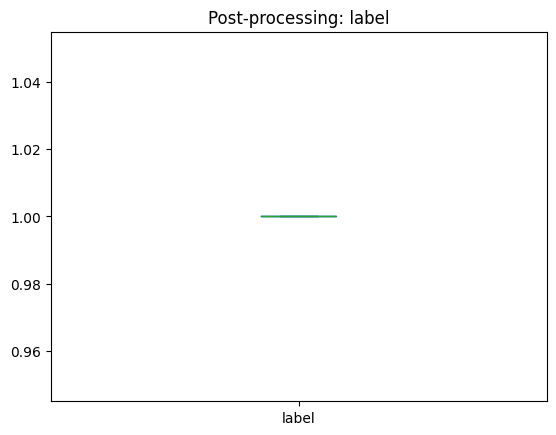

In [13]:
#cek data set
for col in numerical_cols:
    plt.figure()
    df[col].plot(kind='box', title=f'Post-processing: {col}')


In [14]:
#df.to_csv('processed_data.csv', index=False)

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [15]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [16]:
# 1. Feature Selection
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('label')  

selector = SelectKBest(score_func=f_classif, k=20)
X = df[numerical_features]
y = df['label']
selector.fit(X, y)
selected_features = numerical_features[selector.get_support()].tolist()

# 2. Feature Creation
df['URL_DomainLength_Ratio'] = df['URLLength'] / df['DomainLength']
df['Special_Letter_Ratio'] = df['NoOfOtherSpecialCharsInURL'] / df['NoOfLettersInURL']
df['Links_Ratio'] = df['NoOfExternalRef'] / (df['NoOfSelfRef'] + 1)  
df['Total_Links'] = df['NoOfExternalRef'] + df['NoOfSelfRef'] + df['NoOfEmptyRef']
df['Security_Score'] = df['IsHTTPS'] + df['HasFavicon'] + df['Robots']
df['Form_Risk'] = df['HasExternalFormSubmit'] + df['HasHiddenFields'] + df['HasPasswordField']

# Polynomial Features
for col in ['URLLength', 'DomainLength', 'NoOfSubDomain']:
    if col in df.columns:
        df[f'{col}_squared'] = df[col] ** 2

def create_bins(data, col, bins, labels):
    if col in data.columns:
        return pd.cut(data[col], bins=bins, labels=labels)
    return None

df['URLLength_binned'] = create_bins(df, 'URLLength', bins=[0, 20, 40, 60, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])
df['DomainLength_binned'] = create_bins(df, 'DomainLength', bins=[0, 10, 20, 30, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

def remove_features(df, numerical_features, corr_thresh=0.95, missing_thresh=0.5):
    corr_matrix = df[numerical_features].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > corr_thresh)]
    to_drop.extend(df.columns[df.isnull().mean() > missing_thresh].tolist())
    return list(set(to_drop))

features_to_drop = remove_features(df, numerical_features)
df = df.drop(columns=features_to_drop)

print("\nShape of dataset after feature engineering:", df.shape)

/Users/attarlisan/Documents/Tubes2_AI/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)



Shape of dataset after feature engineering: (140404, 67)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='standard', encode_categorical=True, handle_missing=True):
        """
        Parameters:
        - scaling_method: str, 'standard' or 'minmax' for scaling.
        - encode_categorical: bool, whether to one-hot encode categorical features.
        - handle_missing: bool, whether to handle missing data.
        """
        self.scaling_method = scaling_method
        self.encode_categorical = encode_categorical
        self.handle_missing = handle_missing
        self.column_transformer = None

    def fit(self, X, y=None):
        self.numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
        self.categorical_cols = X.select_dtypes(include=['object']).columns

        transformers = []

        if self.handle_missing:
            self.imputer_num = SimpleImputer(strategy='mean')
            self.imputer_cat = SimpleImputer(strategy='most_frequent')
            transformers.append(('num_imputer', self.imputer_num, self.numerical_cols))
            transformers.append(('cat_imputer', self.imputer_cat, self.categorical_cols))

        if self.scaling_method == 'standard':
            self.scaler = StandardScaler()
        elif self.scaling_method == 'minmax':
            from sklearn.preprocessing import MinMaxScaler
            self.scaler = MinMaxScaler()
        transformers.append(('scaler', self.scaler, self.numerical_cols))

        if self.encode_categorical:
            self.encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
            transformers.append(('encoder', self.encoder, self.categorical_cols))

        self.column_transformer = ColumnTransformer(transformers, remainder='passthrough')

        self.column_transformer.fit(X)
        return self

    def transform(self, X):
        X_transformed = self.column_transformer.transform(X)

        feature_names = self.get_feature_names(X)
        X_transformed = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)
        return X_transformed

    def get_feature_names(self, X):
        feature_names = []
        for name, transformer, columns in self.column_transformer.transformers:
            if name == 'encoder':
                feature_names.extend(transformer.get_feature_names_out(columns))
            else:
                feature_names.extend(columns)
        return feature_names

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()  # Gunakan StandardScaler() atau MinMaxScaler() atau RobustScaler()

# Pisahkan fitur dan target
X_train = train_set[numerical_cols]
y_train = train_set['label']  # Pastikan kolom target sesuai
X_val = val_set[numerical_cols]
y_val = val_set['label']

# Fit scaler pada training set dan transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation set menggunakan scaler yang sama
X_val_scaled = scaler.transform(X_val)

# Opsional: Konversi kembali ke DataFrame untuk kejelasan
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=train_set.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=numerical_cols, index=val_set.index)

# Lihat hasil scaling
print("Training Set (Scaled):")
print(X_train_scaled_df.describe())

print("\nValidation Set (Scaled):")
print(X_val_scaled_df.describe())

Training Set (Scaled):
                 id     URLLength  DomainLength    IsDomainIP  \
count  1.123230e+05  6.381000e+04  7.534800e+04  7.864500e+04   
mean  -4.412307e-17 -1.859593e-17 -1.527684e-17  7.047153e-18   
std    1.000004e+00  1.000008e+00  1.000007e+00  1.000006e+00   
min   -1.728443e+00 -5.524161e-01 -2.686074e+00 -2.110062e-02   
25%   -8.658087e-01 -1.894341e-01 -6.204417e-01 -2.110062e-02   
50%   -2.088194e-03 -6.844003e-02 -1.040337e-01 -2.110062e-02   
75%    8.669749e-01  9.288534e-02  5.845103e-01 -2.110062e-02   
max    1.732383e+00  1.623862e+02  1.263403e+01  4.739198e+01   

       CharContinuationRate  TLDLegitimateProb   URLCharProb     TLDLength  \
count          7.393900e+04       6.989500e+04  7.055400e+04  7.413700e+04   
mean           5.450707e-16       4.610217e-17  1.682848e-16 -1.479798e-16   
std            1.000007e+00       1.000007e+00  1.000007e+00  1.000007e+00   
min           -5.774220e+00      -1.120376e+00 -7.207972e+00 -1.374372e+00   
2

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder


categorical_cols = train_set.select_dtypes(include=['object']).columns


def label_encode(train_set, val_set, columns):
    label_encoder = LabelEncoder()
    for col in columns:
        train_set[col] = label_encoder.fit_transform(train_set[col])
        val_set[col] = label_encoder.transform(val_set[col])  
    return train_set, val_set


def one_hot_encode(train_set, val_set, columns):
    
    train_set_encoded = pd.get_dummies(train_set, columns=columns, drop_first=True)
    val_set_encoded = pd.get_dummies(val_set, columns=columns, drop_first=True)

    
    val_set_encoded = val_set_encoded.reindex(columns=train_set_encoded.columns, fill_value=0)
    return train_set_encoded, val_set_encoded


def target_encode(train_set, val_set, columns, target_col):
    target_encoder = TargetEncoder(cols=columns)
    train_set[columns] = target_encoder.fit_transform(train_set[columns], train_set[target_col])
    val_set[columns] = target_encoder.transform(val_set[columns])
    return train_set, val_set



label_encoded_cols = []  
one_hot_encoded_cols = list(categorical_cols)  
target_encoded_cols = []  


if label_encoded_cols:
    train_set, val_set = label_encode(train_set, val_set, label_encoded_cols)


if one_hot_encoded_cols:
    train_set, val_set = one_hot_encode(train_set, val_set, one_hot_encoded_cols)


if target_encoded_cols:
    train_set, val_set = target_encode(train_set, val_set, target_encoded_cols, target_col='label')


print("Training Set After Encoding:")
print(train_set.head())

print("\nValidation Set After Encoding:")
print(val_set.head())


Training Set After Encoding:
           id  URLLength  DomainLength  IsDomainIP  CharContinuationRate  \
28021   46882        NaN          13.0         0.0              0.600000   
71026  118856       25.0          18.0         NaN                   NaN   
89927  150818       25.0          18.0         0.0              0.818182   
94654  158786       27.0          20.0         0.0              1.000000   
35275   58971        NaN          17.0         0.0                   NaN   

       TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  \
28021           0.522907          NaN        NaN            1.0   
71026                NaN     0.061236        3.0            1.0   
89927           0.028555          NaN        NaN            2.0   
94654                NaN     0.066401        3.0            NaN   
35275                NaN          NaN        3.0            NaN   

       HasObfuscation  ...  Title_zyladywear  Title_zymoresearch  \
28021             0.0  ...             Fals

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [20]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [21]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [22]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [23]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [24]:
# Type your code here

## B. Naive Bayes

In [25]:
# Type your code here

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [26]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [27]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`